<a href="https://colab.research.google.com/github/CarysDT/Colab-Notebook/blob/main/Copy_of_Unit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU6proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU6proj.ipynb"

In [2]:
pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import bambi as bmb
import matplotlib.pyplot as plt

**Yards Per Game for 49ers**

I will be using various data sets to analyze and predict the Yards Per Game (YPG) of the 49ers in their most recent seasons.

In [4]:

#have to drop incomplete rows, so that bambi will run
wp = pd.read_csv(
    'https://raw.githubusercontent.com/CarysDT/Colab-Notebook/refs/heads/main/Win%20P%20-%20Sheet1%20(2).csv').dropna()

In [5]:
##Interaction yards per game with Pass completion and Pass attempt
model_wp_intery = bmb.Model("`YPG` ~ `PC` + `PA` + `PYD` + `RYD` + `OS` + `GT` + `HG`", data = wp)
#create the model
idata_wp_intery = model_wp_intery.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PYD', ylabel='YPG'>], dtype=object))

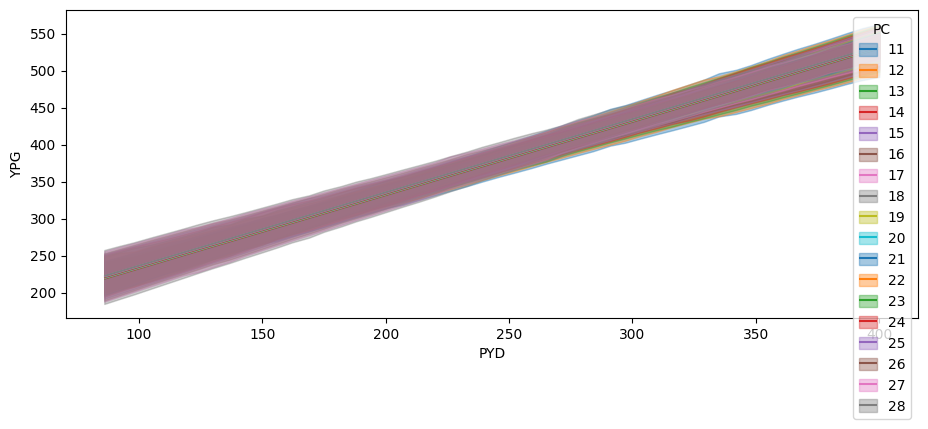

In [6]:
bmb.interpret.plot_predictions(model_wp_intery,
                               idata_wp_intery,
                                ["PYD",  "PC"], fig_kwargs={"figsize":(11, 4)})

This is a very strong positive trend that shows a strong correlation.

In [8]:
az.loo(idata_wp_intery)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,0
elpd_loo,-168.959024
se,20.589989
p_loo,15.277256
n_samples,2000
n_data_points,37
warning,True
loo_i,[<xarray.DataArray 'loo_i' ()> Size: 8B\narray...
pareto_k,[<xarray.DataArray 'pareto_shape' ()> Size: 8B...
scale,log
good_k,0.697064


<Axes: xlabel='YPG'>

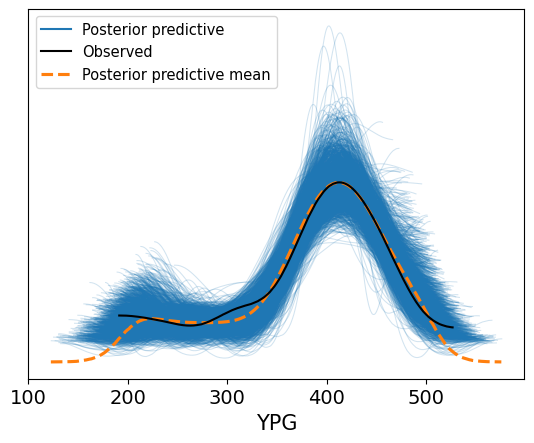

In [10]:
model_wp_intery.predict(idata_wp_intery, kind="response")
az.plot_ppc(idata_wp_intery)

In [11]:
##Interaction yards per game with Pass completion and Pass attempt
model_wp_inter = bmb.Model("`YPG` ~ `PC` + `PA` + `PC`:`PA`", data=wp)
#create the model
idata_wp_inter = model_wp_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PC', ylabel='YPG'>], dtype=object))

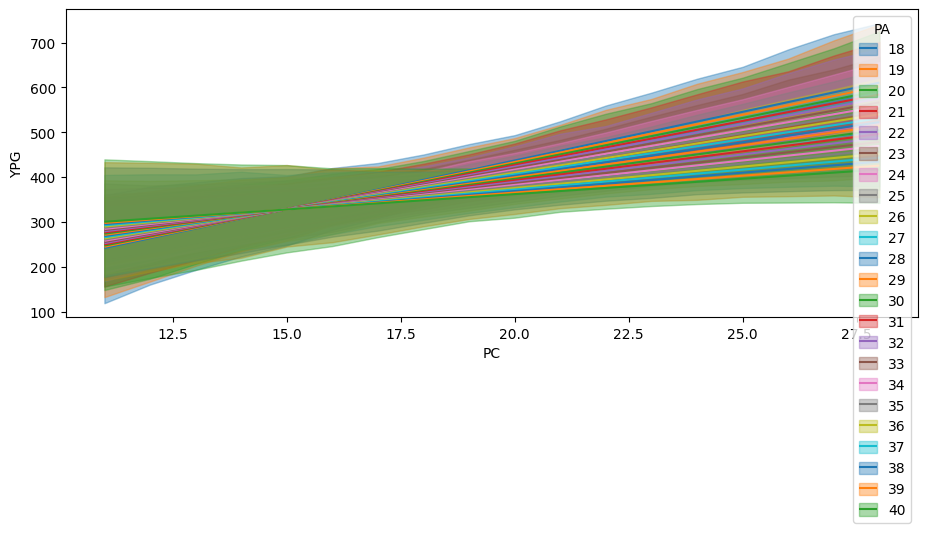

In [12]:
bmb.interpret.plot_predictions(model_wp_inter,
                               idata_wp_inter,
                                ["PC",  "PA"], fig_kwargs={"figsize":(11, 4)})

There is a relativly strong trend here, this time with pass completion and pass average.

<Axes: xlabel='YPG'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


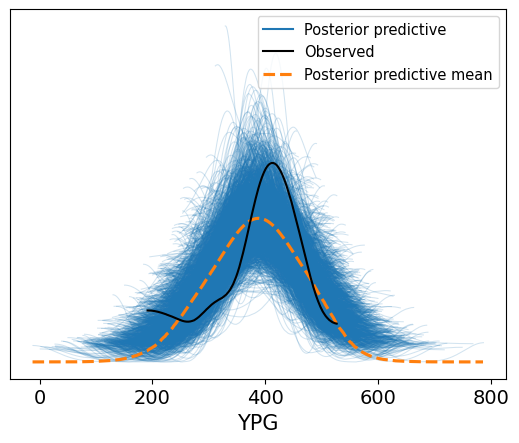

In [13]:
model_wp_inter.predict(idata_wp_inter, kind="response")
az.plot_ppc(idata_wp_inter)

In [14]:
##Interaction of Yards per game with Pass completion and Passing Yards
model_wp_interq = bmb.Model("`YPG` ~ `PC` + `PYD` + `PC`:`PYD`", data=wp)
#create the model
idata_wp_interq = model_wp_interq.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PC', ylabel='YPG'>], dtype=object))

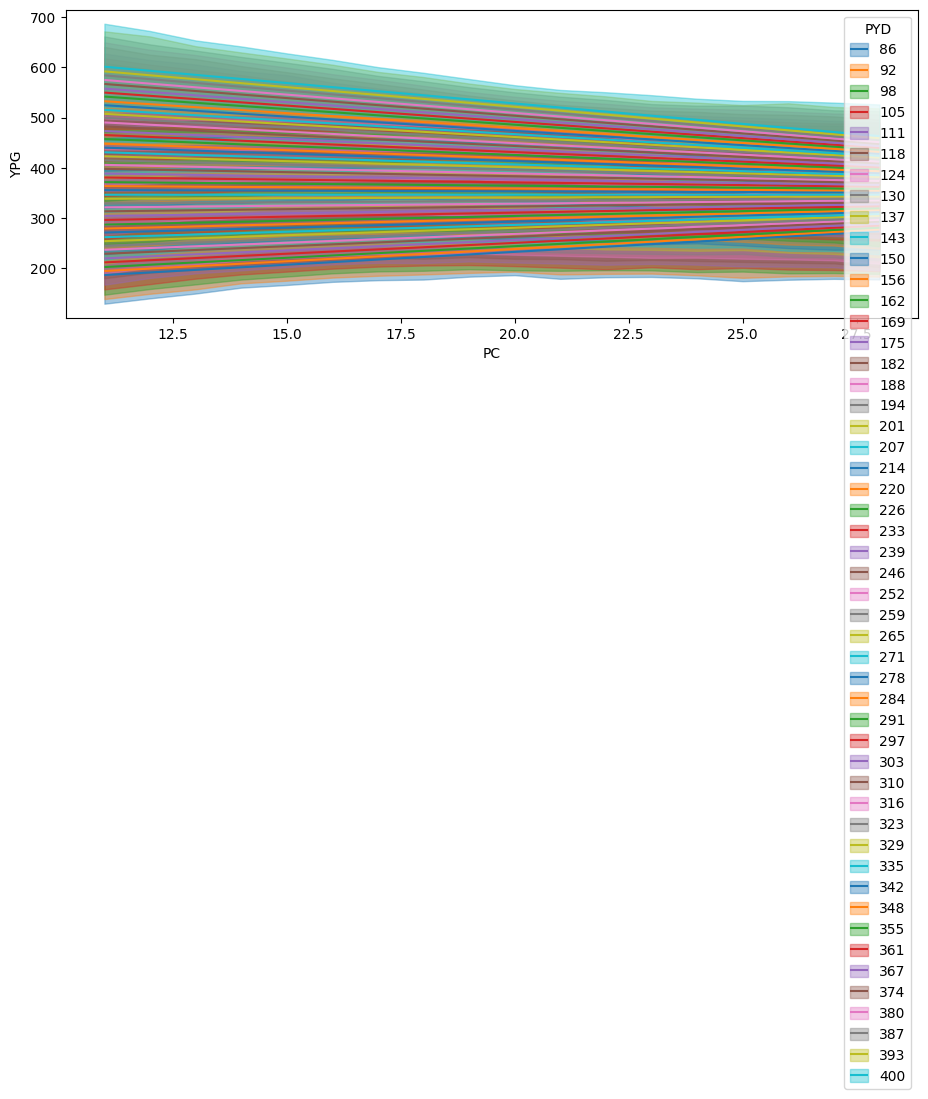

In [15]:
bmb.interpret.plot_predictions(model_wp_interq,
                               idata_wp_interq,
                                ["PC",  "PYD"], fig_kwargs={"figsize":(11, 4)})

there is not much of a relation here, since there is a a wide range and no trendline.

<Axes: xlabel='YPG'>

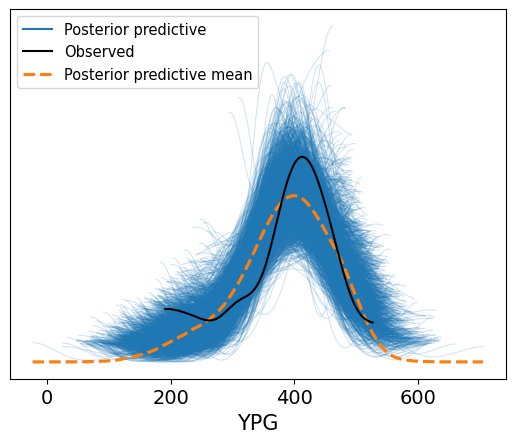

In [16]:
model_wp_interq.predict(idata_wp_interq, kind="response")
az.plot_ppc(idata_wp_interq)

In [17]:
#cmp_df stands for compare dataframe
cmp_df_q = az.compare( {"multi_lin":idata_wp_inter,"single_lin":idata_wp_interq} )

#0 is the best rank; we want a lower elpd_loo
cmp_df_q

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
single_lin,0,-192.974180,4.246707,0.000000,1.0,4.469411,0.000000,False,log
multi_lin,1,-210.263747,3.843991,17.289567,0.0,4.005644,4.929367,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

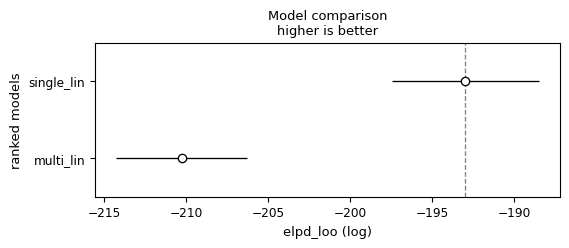

In [18]:
az.plot_compare(cmp_df_q)

Using Pass Competion (PC) and Passing Yards (PYD) to predict Yards per Game (YPG) was more accurate than using Pass Completion and Pass Attempt (PA) to predict Yards per Game.

In [19]:
##Predicting Opponent Strength (OS) using Game Type (GT) and whether it's a Home Game (HG)
model_wp_interw = bmb.Model("`OS` ~ `GT` + `HG` + `GT`:`HG`", data=wp)
#create the model
idata_wp_interw = model_wp_interw.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='GT', ylabel='OS'>], dtype=object))

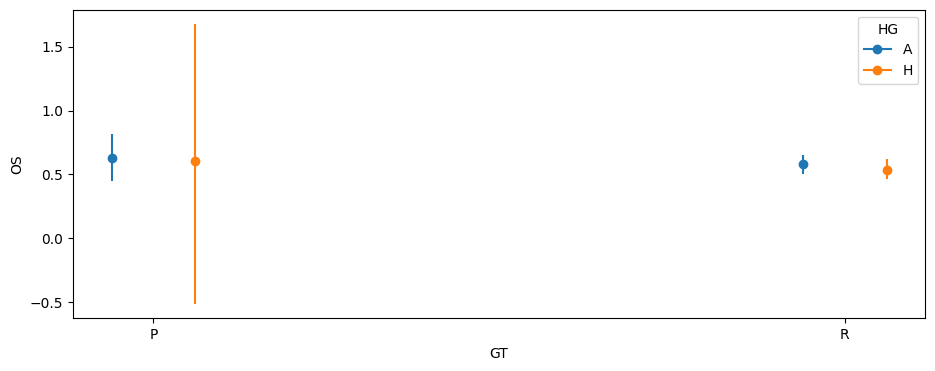

In [20]:
bmb.interpret.plot_predictions(model_wp_interw,
                               idata_wp_interw,
                                ["GT",  "HG"], fig_kwargs={"figsize":(11, 4)})

<Axes: xlabel='OS'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


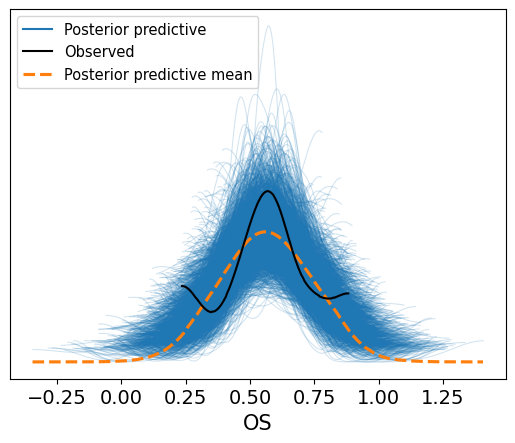

In [21]:
model_wp_interw.predict(idata_wp_interw, kind="response")
az.plot_ppc(idata_wp_interw)

In [22]:
#Predicting Yards Per Game using all passing stats, Pass Completion (PC), Rushing Yards (RYD), and Passing Yards (PYD)
model_wp_intere = bmb.Model("`YPG` ~ `PYD` + `PC` + `RYD` + `PYD`:`PC` + `PYD`:`RYD` + `PYD`:`YPG` + `PC`:`RYD` + `RYD`:`YPG` + `PC`:`YPG`", data=wp)
#create the model
idata_wp_intere = model_wp_intere.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PYD', ylabel='YPG'>], dtype=object))

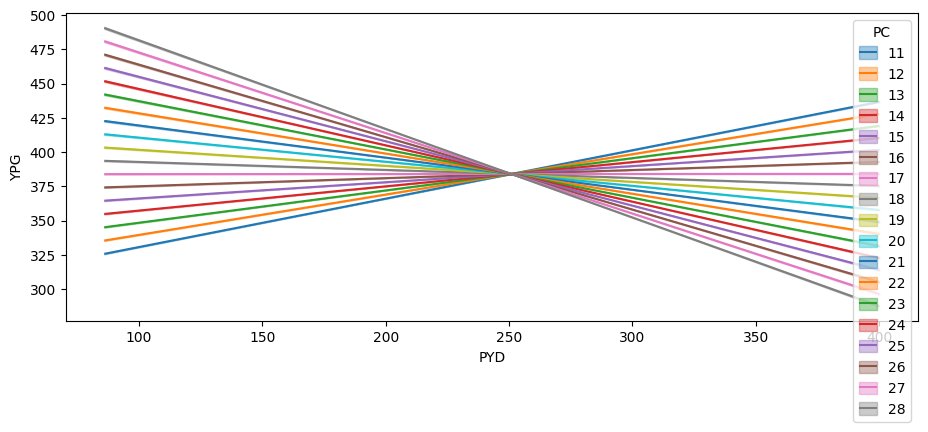

In [23]:
bmb.interpret.plot_predictions(model_wp_intere,
                               idata_wp_intere,
                                ["PYD",  "PC"], fig_kwargs={"figsize":(11, 4)})

As pass completion goes up, Yards per game goes up as well, with a median convergence around 250 yards

<Axes: xlabel='YPG'>

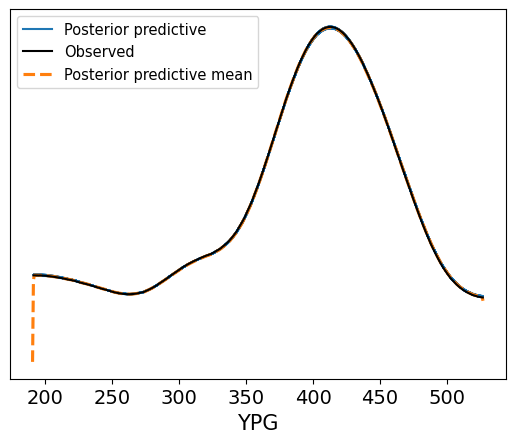

In [24]:
model_wp_intere.predict(idata_wp_intere, kind="response")
az.plot_ppc(idata_wp_intere)

In [25]:
az.loo(idata_wp_intere)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,0
elpd_loo,22.988014
se,13.152753
p_loo,15.473675
n_samples,2000
n_data_points,37
warning,True
loo_i,[<xarray.DataArray 'loo_i' ()> Size: 8B\narray...
pareto_k,[<xarray.DataArray 'pareto_shape' ()> Size: 8B...
scale,log
good_k,0.697064


In [26]:
#cmp_df stands for compare dataframe
cmp_df_e = az.compare( {"multi_lin":idata_wp_inter,"single_lin":idata_wp_intere} )

#0 is the best rank; we want a lower elpd_loo
cmp_df_e

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
single_lin,0,22.988014,15.473675,0.00000,0.974465,13.152753,0.000000,True,log
multi_lin,1,-210.263747,3.843991,233.25176,0.025535,4.005644,13.864259,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

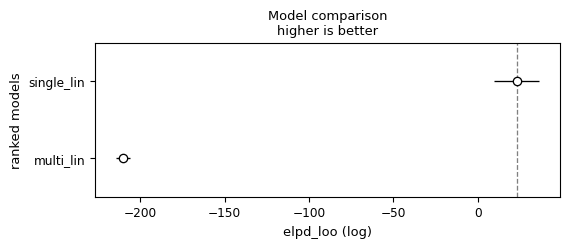

In [27]:
az.plot_compare(cmp_df_e)

The graph comparing Pass Attempts and Pass Completions in order to predict yards per game was much less accurate than using all yard variables (pass yards, rush yards, pass completion) to predict yards per game.

In [28]:
#cmp_df stands for compare dataframe
cmp_df_f = az.compare( {"multi_lin":idata_wp_interq,"single_lin":idata_wp_intere} )

#0 is the best rank; we want a lower elpd_loo
cmp_df_f

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
single_lin,0,22.988014,15.473675,0.000000,0.974065,13.152753,0.000000,True,log
multi_lin,1,-192.974180,4.246707,215.962193,0.025935,4.469411,13.801231,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

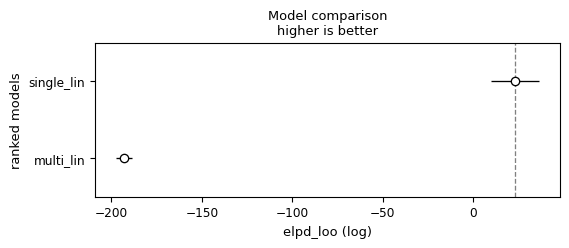

In [29]:
az.plot_compare(cmp_df_f)

In [30]:
#Predicting Yards Per Game using Pass Completion (PC), Pass Attempts (PA), and Opponent Strength (OS)
model_wp_interr = bmb.Model("`YPG` ~ `PA` + `PC` + `OS` + `PA`:`PC` + `PA`:`OS` + `PA`:`YPG` + `PC`:`OS` + `OS`:`YPG` + `PC`:`YPG`", data=wp)
#create the model
idata_wp_interr = model_wp_interr.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

<Axes: xlabel='YPG'>

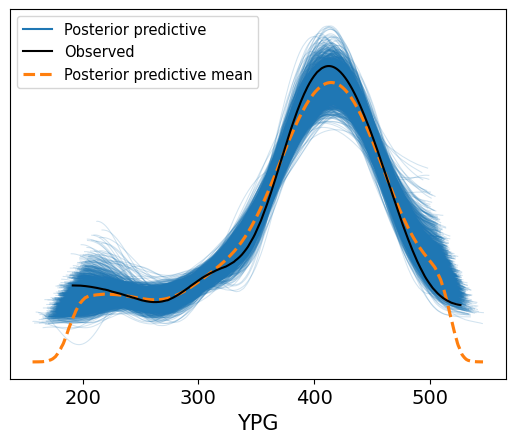

In [31]:
model_wp_interr.predict(idata_wp_interr, kind="response")
az.plot_ppc(idata_wp_interr)

In [32]:
cmp_df_t = az.compare( {"multi_lin":idata_wp_intere,"single_lin":idata_wp_interr} )

#0 is the best rank; we want a lower elpd_loo
cmp_df_t

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
multi_lin,0,22.988014,15.473675,0.000000,0.972612,13.152753,0.000000,True,log
single_lin,1,-130.991730,13.168578,153.979743,0.027388,6.079739,14.908838,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

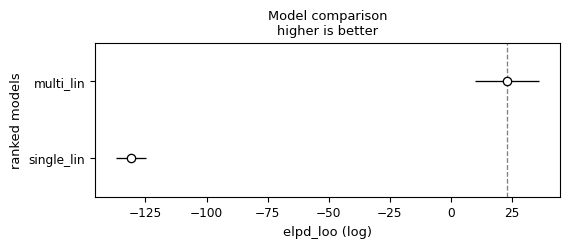

In [33]:
az.plot_compare(cmp_df_t)

In [34]:
#Predicting Yards Per Game using Pass Completion (PC), Pass Attempts (PA), and Opponent Strength (OS)
model_wp_interu = bmb.Model("`YPG` ~ `PA` + `PC` + `TO` + `PA`:`PC` + `PA`:`TO` + `PA`:`YPG` + `PC`:`TO` + `TO`:`YPG` + `PC`:`YPG`", data=wp)
#create the model
idata_wp_interu = model_wp_interu.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PA', ylabel='YPG'>], dtype=object))

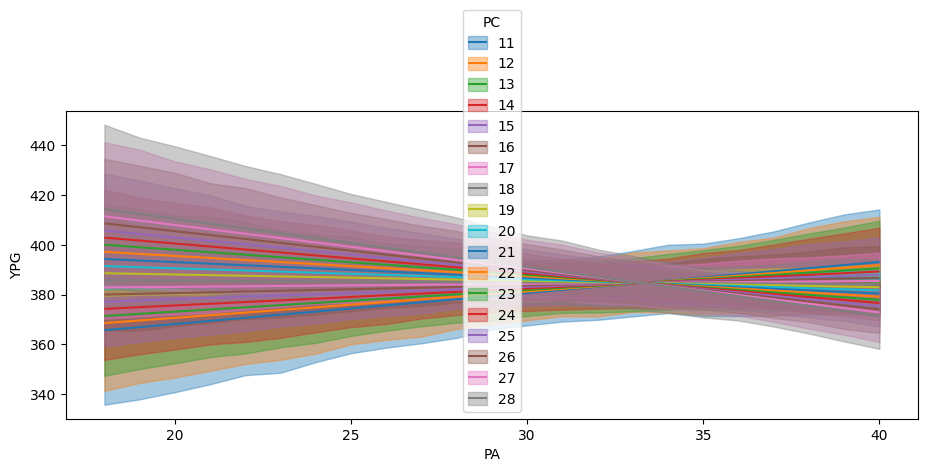

In [35]:
bmb.interpret.plot_predictions(model_wp_interu,
                               idata_wp_interu,
                                ["PA",  "PC"], fig_kwargs={"figsize":(11, 4)})

In [36]:
#Predicting Yards Per Game using Pass Completion (PC), Pass Attempts (PA), and Turn Overs (TO)
model_wp_interi = bmb.Model("`YPG` ~ `PA` + `PC` + `TO` + `PA`:`PC` + `PA`:`TO` + `PA`:`YPG` + `PC`:`TO` + `TO`:`YPG` + `PC`:`YPG`", data=wp)
#create the model
idata_wp_interi = model_wp_interu.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [37]:
cmp_df_t = az.compare( {"multi_lin":idata_wp_interu,"single_lin":idata_wp_interi} )

#0 is the best rank; we want a lower elpd_loo
cmp_df_t

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
single_lin,0,-140.104181,11.398849,0.000000,1.0,3.961124,0.000000,True,log
multi_lin,1,-140.406967,11.803912,0.302786,0.0,4.217286,0.363438,True,log


In [38]:
#Predicting Yards Per Game using all passing stats, Pass Completion (PC), Rushing Yards (RYD), and Passing Yards (PYD)
model_wp_intero = bmb.Model("`YPG` ~ `PYD` + `RYD` + `PYD`:`RYD` + `PYD`:`YPG` + `RYD`:`YPG`", data=wp)
#create the model
idata_wp_intero = model_wp_intere.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PYD', ylabel='YPG'>], dtype=object))

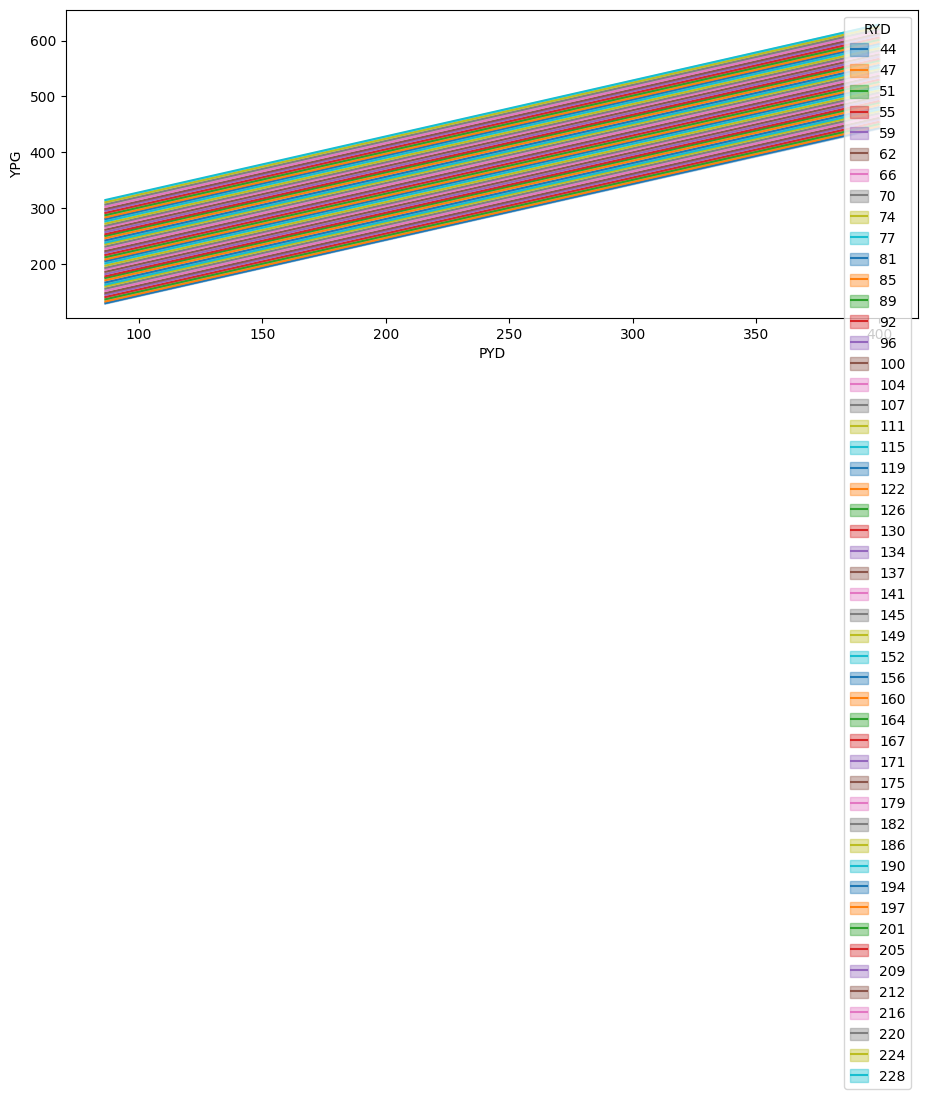

In [39]:
bmb.interpret.plot_predictions(model_wp_intero,
                               idata_wp_intero,
                                ["PYD",  "RYD"], fig_kwargs={"figsize":(11, 4)})

In [40]:
az.loo(idata_wp_intero)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,0
elpd_loo,21.996711
se,14.339011
p_loo,16.675241
n_samples,2000
n_data_points,37
warning,True
loo_i,[<xarray.DataArray 'loo_i' ()> Size: 8B\narray...
pareto_k,[<xarray.DataArray 'pareto_shape' ()> Size: 8B...
scale,log
good_k,0.697064


In [41]:
cmp_df_y = az.compare( {"multi_lin":idata_wp_intere,"single_lin":idata_wp_intero} )

#0 is the best rank; we want a lower elpd_loo
cmp_df_y

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
multi_lin,0,22.988014,15.473675,0.000000,1.0,13.152753,0.000000,True,log
single_lin,1,21.996711,16.675241,0.991303,0.0,14.339011,1.335191,True,log


The best correlation, based on elp_loo was Rushing yards, Passing yards, and pass completion with Yards Per game. This makes sense because these are the most direct, major factors that go into yards per game.

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.
